In [196]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data    = np.genfromtxt("data.txt", delimiter=',')

x       = data[:, 0]
y       = data[:, 1]
label   = data[:, 2]

x_label0    = x[label == 0]
x_label1    = x[label == 1]

y_label0    = y[label == 0]
y_label1    = y[label == 1]

X = np.append(np.append( np.asarray([1]*100) , x) , y)
X = np.reshape(X, (3, 100))

(3, 100)

## Plot the training data

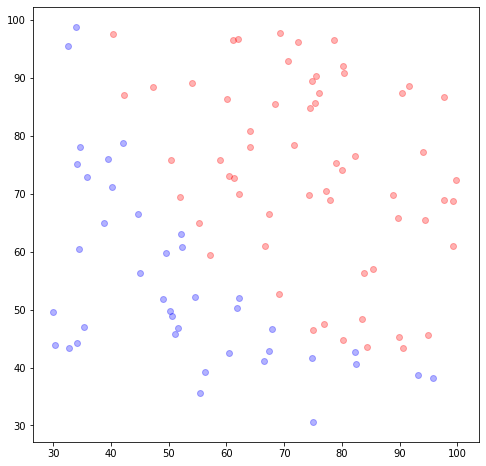

In [3]:
plt.figure(figsize=(8, 8))
plt.scatter(x_label0, y_label0, alpha=0.3, c='b')
plt.scatter(x_label1, y_label1, alpha=0.3, c='r')
plt.show()

In [250]:
seta = np.asarray([-50, -10, 2.0])
np.reshape(seta, (3, 1))
seta_list = [seta.copy()]
err_list = []

lr = 0.002
epochs = 6000000
A = None
M = len(x)

for i in range(epochs):
    #forpass
    Z = np.dot(seta, X)
    A = 1/(1+np.exp(-Z))
    ERR = -(label-A)
    
    #backprop
    for k in range(3):
        seta[k] -= lr * np.sum(ERR * X[k]) / M
    
    #history
    seta_list.append(seta.copy())
    A = np.clip(A, 1e-10, 1-1e-10)
    
    loss = np.sum(-(label*np.log(A) + (1-label)*np.log(1-A)))/M
    err_list.append(loss)

In [251]:
correct = 0
for i, a in enumerate(A):
    if a <= 0.5 and label[i] == 0 :
        correct += 1
    elif a > 0.5 and label[i] == 1:
        correct += 1

print(correct)

90


## Plot the estimated parameters

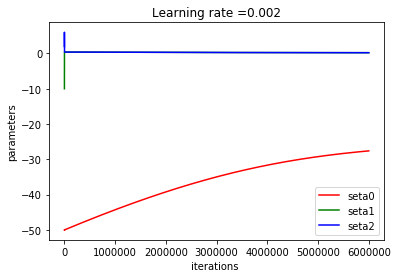

In [252]:
colors = ['r', 'g', 'b']
for i in range(3):
    temp_list = [x[i] for x in seta_list]
    plt.plot(np.squeeze(temp_list), color = colors[i], label=f"seta{i}")
plt.ylabel('parameters')
plt.xlabel('iterations ')
plt.legend()
plt.title("Learning rate =" + str(lr))
plt.show()

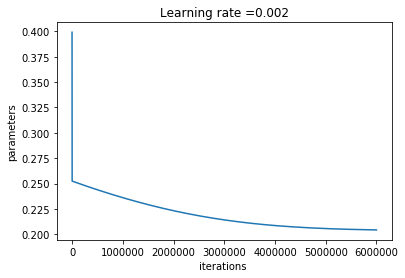

In [257]:
plt.plot(np.squeeze(err_list[600:]))
plt.ylabel('parameters')
plt.xlabel('iterations ')
plt.title("Learning rate =" + str(lr))
plt.show()